### Задача 1
1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
salary = np.array([[35, 45, 190, 200, 40, 70, 54, 150, 120, 110]])
scoring = np.array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

#### Коэффициенты линейной регрессии с помощью формул для парной регрессии

In [17]:
b1 = np.cov((salary[0], scoring[0]))[0, 1] / pow(np.std(salary), 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0, b1

(414.6526192492885, 2.911709869336405)

#### Коэффициенты линейной регрессии с помощью метода наименьших квадратов

In [23]:
salary = salary.reshape(-1, 1)
scoring = scoring.reshape(-1, 1)

ones = np.ones((salary.shape[0], 1))
salary_ones = np.hstack((ones, salary))

XTX = salary_ones.T.dot(salary_ones)

b = np.linalg.inv(XTX).dot(salary_ones.T).dot(scoring)
b[0][0], b[1][0]

(444.1773573243596, 2.6205388824027636)

#### scatter plot

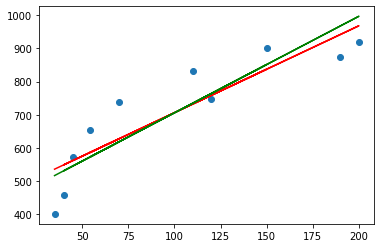

In [24]:
plt.scatter(salary, scoring)
plt.plot(salary, salary_ones.dot(b), color='red')
plt.plot(salary, salary_ones.dot(np.array([[b0],[b1]])), color='green')
plt.show()

#### Коэффициент детерминации

In [26]:
z_pair = salary_ones.dot(np.array([[b0],[b1]]))
z_std = salary_ones.dot(b)

coef_det_pair = 1 - (z_pair-scoring).var()/scoring.var()
coef_det_std = 1 - (z_std-scoring).var()/scoring.var()
coef_det_pair, coef_det_std

(0.7779147294117221, 0.7876386635293686)

#### Средняя ошибка аппроксимации

In [28]:
np.abs((scoring - z_pair) / scoring).mean(), np.abs((scoring - z_std) / scoring).mean()

(0.1171197299778263, 0.11469251843561704)

#### Оценка с помощью F-критерия Фишера

In [29]:
alpha = 0.05
stats.f.ppf(1 - alpha, scoring.shape[1], scoring.shape[0] - scoring.shape[1] - 1)

5.317655071578714

In [30]:
F_std = (coef_det_std/scoring.shape[1])/((1-coef_det_std)/(scoring.shape[0] - scoring.shape[1] - 1))
F_pair = (coef_det_pair/scoring.shape[1])/((1-coef_det_pair)/(scoring.shape[0] - scoring.shape[1] - 1))
F_std, F_pair

(29.67164085966451, 28.022199846072354)

Оба значения больше чем критиеческое, уравнение статистически значимо

#### Доверительные интервалы с помощью t-статистики Стьюдента

In [33]:
def standard_error_slope(factor, real, approx):
    return np.sqrt(((1/(factor.shape[0]-2))*(real-approx)**2).sum()/((factor-factor.mean())**2).sum())


def standard_error_intercept(factor, real, approx):
    return standard_error_slope(factor, real, approx)*np.sqrt((factor**2).mean())

In [34]:
alpha = 0.05
t = stats.t.ppf(1 - alpha / 2, scoring.shape[0] - 2)
err_std = standard_error_slope(salary, scoring, salary_ones.dot(b))
b[1][0] - t * err_std, b[1][0] + t*err_std

(1.5111599662593704, 3.7299177985461567)

In [35]:
err_std_int = standard_error_intercept(salary, scoring, salary_ones.dot(b))
b[0][0] - t*err_std_int, b[0][0] + t*err_std_int

(313.9653804816363, 574.3893341670829)

In [36]:
err_pair = standard_error_slope(salary, scoring, salary_ones.dot(np.array([[b0],[b1]])))
b1 - t*err_pair, b1 + t*err_pair

(1.7772162419624697, 4.046203496710341)

In [37]:
err_pair_int = standard_error_intercept(salary, scoring, salary_ones.dot(np.array([[b0],[b1]])))
b0 - t*err_pair_int, b0 + t * err_pair_int

(281.4928342685382, 547.8124042300387)

### Задача 2
Первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [39]:
y1 = scoring[:5]
y2 = scoring[5:]
n1 = y1.shape[0]
n2 = y2.shape[0]


y1_mean = y1.mean()
y2_mean = y2.mean()
y = np.concatenate((y1, y2))
y_mean = y.mean()


S2_b = n1*(y1_mean - y_mean) + n2 * (y2_mean - y_mean)
S2_w = ((y1 - y1_mean)**2).sum() + ((y2 - y2_mean)**2).sum()
S2_b, S2_w

(0.0, 263086.39999999997)

In [41]:
k = 2
n = n1 + n2
k1 = k - 1
k2 = n - k
sigma_2b = S2_b / k1
sigma_2w = S2_w / k2


F = sigma_2b/sigma_2w
F

0.0

In [42]:
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha, k1, k2)
f_crit

5.317655071578714

F < f_crit, поэтому данный фактор не влияет на значение кредитного скоринга.

### Задача 3
По каждой паре выборок посчитайте:
1. Выборочное среднее и дисперсию каждой выборки,
2. Коэффициент корреляции Пирсона и прямую линейной регрессии.  

Постройте scatter plot по каждой паре выборок.

In [43]:
X1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
X2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
X3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
X4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
Y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

#### Выборочное среднее

In [44]:
(X1.mean(), Y1.mean()), (X2.mean(), Y2.mean()), (X3.mean(), Y3.mean()), (X4.mean(), Y4.mean())

((9.0, 7.500909090909093),
 (9.0, 7.50090909090909),
 (9.0, 7.5),
 (9.0, 7.500909090909091))

#### Дисперсия

In [45]:
(X1.var(), Y1.var()), (X2.var(), Y2.var()), (X3.var(), Y3.var()), (X4.var(), Y4.var())

((10.0, 3.7520628099173554),
 (10.0, 3.752390082644628),
 (10.0, 3.747836363636364),
 (10.0, 3.7484082644628103))

#### Коэффициент корреляции Пирсона

In [46]:
stats.pearsonr(X1, Y1)[0], stats.pearsonr(X2, Y2)[0], stats.pearsonr(X3, Y3)[0], stats.pearsonr(X4, Y4)[0]

(0.81642051634484, 0.8162365060002427, 0.8162867394895982, 0.8165214368885029)

#### Прямая линейная регрессия

In [47]:
X1_Y1_b1 = np.cov((X1, Y1))[0, 1]/pow(np.std(X1), 2)
X1_Y1_b0 = np.mean(Y1)-X1_Y1_b1*np.mean(X1)
X1_Y1_b1, X1_Y1_b0

(0.5501, 2.550009090909092)

In [48]:
X2_Y2_b1 = np.cov((X2, Y2))[0, 1]/pow(np.std(X2), 2)
X2_Y2_b0 = np.mean(Y2)-X2_Y2_b1*np.mean(X2)
X2_Y2_b1, X2_Y2_b0

(0.55, 2.55090909090909)

In [49]:
X3_Y3_b1 = np.cov((X3, Y3))[0, 1]/pow(np.std(X3), 2)
X3_Y3_b0 = np.mean(Y3)-X3_Y3_b1*np.mean(X3)
X3_Y3_b1, X3_Y3_b0

(0.5497000000000001, 2.5526999999999997)

In [50]:
X4_Y4_b1 = np.cov((X4, Y4))[0, 1]/pow(np.std(X4), 2)
X4_Y4_b0 = np.mean(Y4)-X4_Y4_b1*np.mean(X4)
X4_Y4_b1, X4_Y4_b0

(0.5498999999999998, 2.5518090909090922)

#### scatter plot

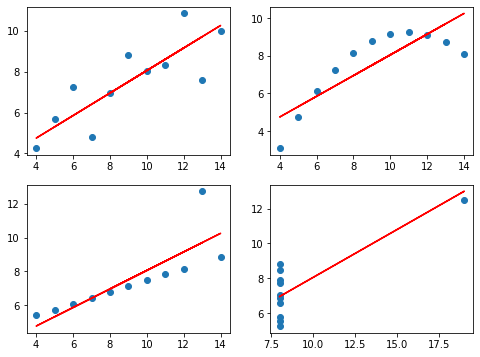

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.scatter(X1, Y1)
ax1.plot(X1, X1_Y1_b1*X1 + X1_Y1_b0, color = 'red')

ax2.scatter(X2, Y2)
ax2.plot(X2, X2_Y2_b1*X2 + X2_Y2_b0, color = 'red')

ax3.scatter(X3, Y3)
ax3.plot(X3, X3_Y3_b1*X3 + X3_Y3_b0, color = 'red')

ax4.scatter(X4, Y4)
ax4.plot(X4, X4_Y4_b1*X4 + X4_Y4_b0, color = 'red')
fig.set_size_inches(8, 6)